### Importing Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

### Reading the csv file




In [13]:
train=pd.read_csv(r"C:\Users\shash\Downloads\archive\train.csv")
test=pd.read_csv(r"C:\Users\shash\Downloads\archive\test.csv")


In [14]:
df=train.merge(test,how="outer")

### Data size

In [57]:
train.shape

(381109, 12)

In [56]:
test.shape

(127037, 11)

In [17]:
df.size

6097752

In [18]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0


In [22]:
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
508141,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56,NaN
508142,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165,NaN
508143,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74,NaN
508144,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265,NaN
508145,508146,Male,41,1,29.0,1,1-2 Year,No,27927.0,124.0,231,NaN


### Checking for descriptive statistics 


In [21]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,381109.000000
mean,254073.500000,38.808413,0.997936,26.406572,0.458667,30554.453041,111.975838,154.340123,0.122563
std,146689.259281,15.500179,0.045388,13.224921,0.498289,17146.574625,54.246027,83.668793,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,127037.250000,25.000000,1.000000,15.000000,0.000000,24381.000000,26.000000,82.000000,0.000000
50%,254073.500000,36.000000,1.000000,28.000000,0.000000,31661.000000,133.000000,154.000000,0.000000
75%,381109.750000,49.000000,1.000000,35.000000,1.000000,39403.750000,152.000000,227.000000,0.000000
max,508146.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Overview of the columns in the dataset

In [24]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [25]:
# Getting information about the columns of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508146 entries, 0 to 508145
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    508146 non-null  int64  
 1   Gender                508146 non-null  object 
 2   Age                   508146 non-null  int64  
 3   Driving_License       508146 non-null  int64  
 4   Region_Code           508146 non-null  float64
 5   Previously_Insured    508146 non-null  int64  
 6   Vehicle_Age           508146 non-null  object 
 7   Vehicle_Damage        508146 non-null  object 
 8   Annual_Premium        508146 non-null  float64
 9   Policy_Sales_Channel  508146 non-null  float64
 10  Vintage               508146 non-null  int64  
 11  Response              381109 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 50.4+ MB


#### There are 3 columns having float datatype, 6 columns of having int datatype and 3 are of categorical types.

### Check for null values

In [27]:
df.isnull().sum()

id                           0
Gender                       0
Age                          0
Driving_License              0
Region_Code                  0
Previously_Insured           0
Vehicle_Age                  0
Vehicle_Damage               0
Annual_Premium               0
Policy_Sales_Channel         0
Vintage                      0
Response                127037
dtype: int64

#### It is visible that there is no missing value in our dataset.So we can proceed for data analysis.



## Exploratory Data Analysis

In [31]:
df["Response"].value_counts()

0.0    334399
1.0     46710
Name: Response, dtype: int64

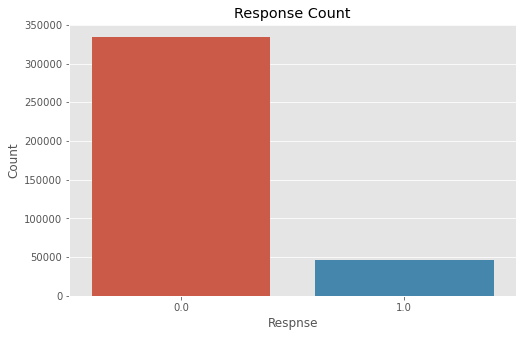

In [33]:
# How many people give positive response and negative respone?
plt.figure(figsize=(8,5))
sns.countplot(df["Response"])
plt.title("Response Count")
plt.xlabel("Respnse")
plt.ylabel('Count')
plt.show()


#### From the above plot and count , we can see that the data is imbalanced


In [58]:
# Prediction of ratio of gender count
df['Gender'].value_counts()

Male      274325
Female    233821
Name: Gender, dtype: int64

#### There are more males than females in the dataset


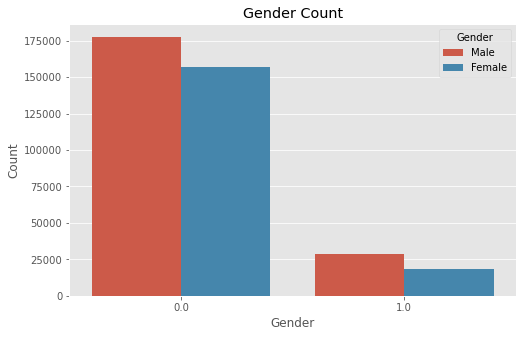

In [59]:
# Counting the number of males and females
plt.figure(figsize=(8,5))
sns.countplot(df['Response'],hue=df['Gender'])
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

## Univariate Analysis

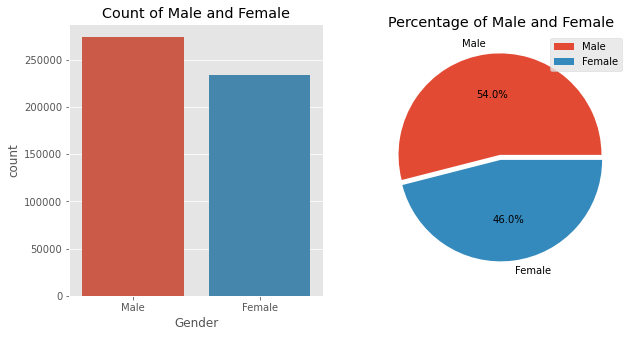

In [60]:
plt.figure(figsize=(10,5))

    
plt.subplot(1,2,1)
plt.title('Count of Male and Female')
sns.countplot(df['Gender'])
plt.subplot(1,2,2)
plt.pie(df['Gender'].value_counts(), explode=[0.05,0] ,autopct='%.1f%%', labels=['Male',"Female"])
plt.title('Percentage of Male and Female')
                                                                                    
plt.legend()
plt.show()

#### Above Plots shows that Male tend to subscribe to insurence more than female.
#### Therefore we can assume that gender plays an important role in model building.

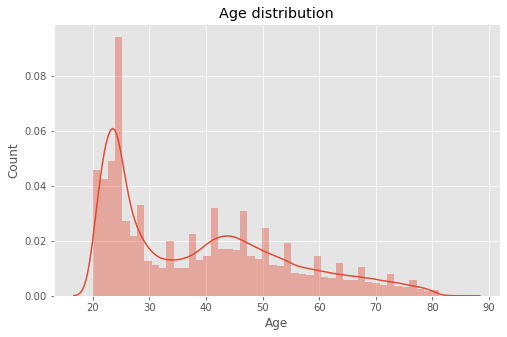

In [61]:
# Check whether the age column is normalised or not.
plt.figure(figsize=(8,5))
sns.distplot(df['Age'])
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### We can see that Age distribution is not normalized. Also the maximum frequency of age is around 24.


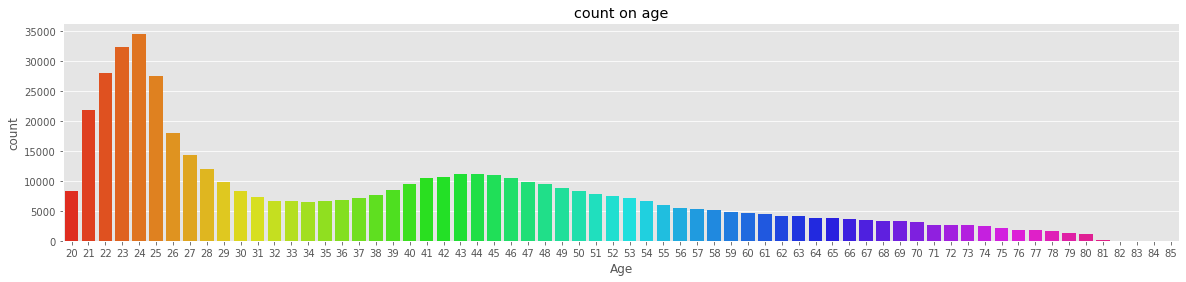

In [62]:
plt.figure(figsize=(20,4))
sns.countplot(df['Age'], palette= 'hsv')
plt.title("count on age")
plt.show()

#### People whose age is 24 are the one who are taking the insurance more.


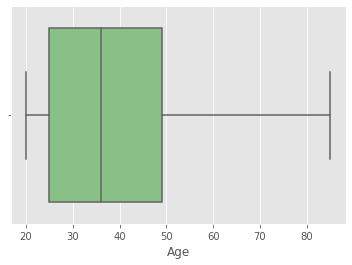

In [63]:
plt.subplot(1,1,1)
sns.boxplot(df['Age'], palette= 'Accent')
plt.show()

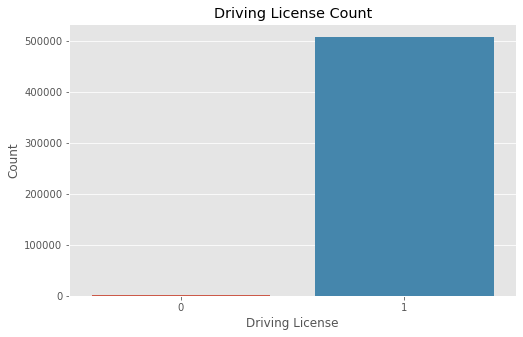

In [64]:
#What is the driving licence count?
plt.figure(figsize=(8,5))
sns.countplot(df['Driving_License'])
plt.title('Driving License Count')
plt.xlabel('Driving License')
plt.ylabel('Count')
plt.show()

#### So most of the people have driving licence.

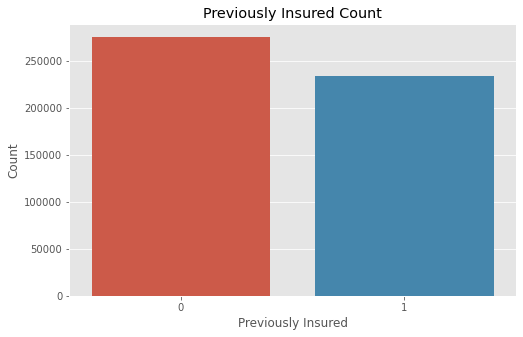

In [65]:
# What is the percentage of people who took the insurance previously?

plt.figure(figsize=(8,5))
sns.countplot(df['Previously_Insured'])
plt.title('Previously Insured Count')
plt.xlabel('Previously Insured')
plt.ylabel('Count')
plt.show()

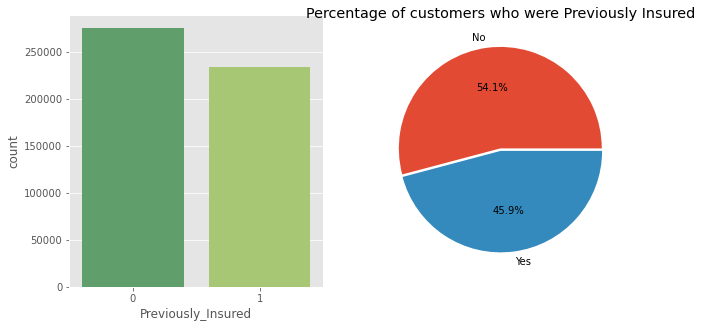

In [73]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x = df["Previously_Insured"], palette='summer')

plt.subplot(1,2,2)
plt.pie(df['Previously_Insured'].value_counts(), labels = ["No", "Yes"], explode=[0.025,0] ,autopct='%.1f%%', labeldistance=1.1)

plt.title('Percentage of customers who were Previously Insured')
plt.show()

#### We can see that above 50% of the customers is not previously Insured

Percentage of Previously_Insured feature 
0    54.133261
1    45.866739
Name: Previously_Insured, dtype: float64


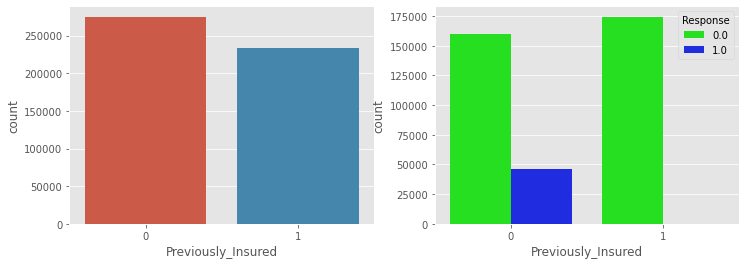

In [75]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(df['Previously_Insured'])
plt.subplot(1,2,2)
sns.countplot(df['Previously_Insured'], hue=df['Response'], palette= 'hsv' )
print("Percentage of Previously_Insured feature ")
print(df['Previously_Insured'].value_counts()/len(df)*100)
plt.show()

#### Customers who has not previously insured are likely to be interested


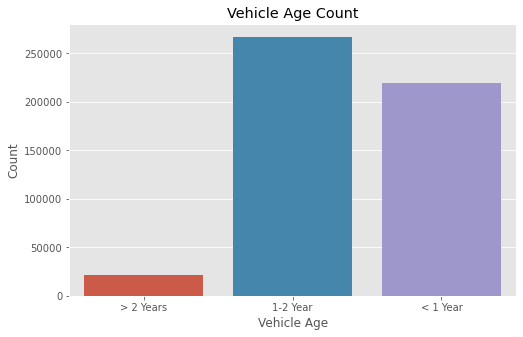

In [101]:
#  How old is the vehicle and what is the count of it?
plt.figure(figsize=(8,5))
sns.countplot(df['Vehicle_Age'])
plt.title('Vehicle Age Count')
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.show()

#### So we can see that most of the vehicles are almost new with maximum of 1-2 years and less than a year's age.

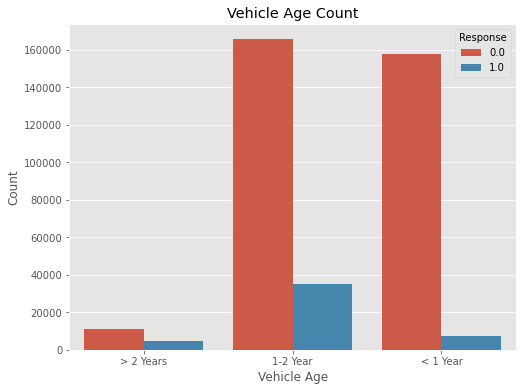

In [104]:
plt.figure(figsize=(8,6))
sns.countplot(df['Vehicle_Age'],hue=df["Response"])
plt.title('Vehicle Age Count')
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.show()

#### We can see that buyers whose vehicle are between 1 to 2 years are more willing to buy insurance rather whose vehicle are less than 1 year or more than 2 years.

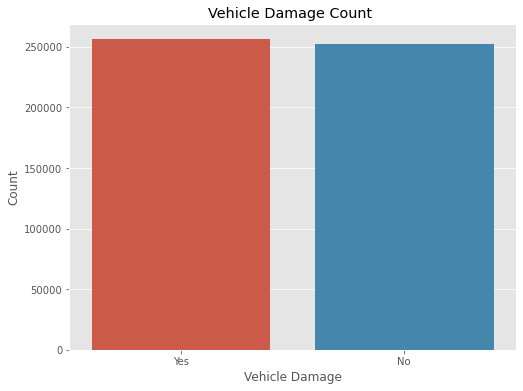

In [105]:
# What is the count of vehicle with damage?
plt.figure(figsize=(8,6))
sns.countplot(df['Vehicle_Damage'])
plt.title('Vehicle Damage Count ')
plt.xlabel('Vehicle Damage')
plt.ylabel('Count')
plt.show()

#### From the above barplot we can see that equal number of records have damaged and non-damaged vehicles.


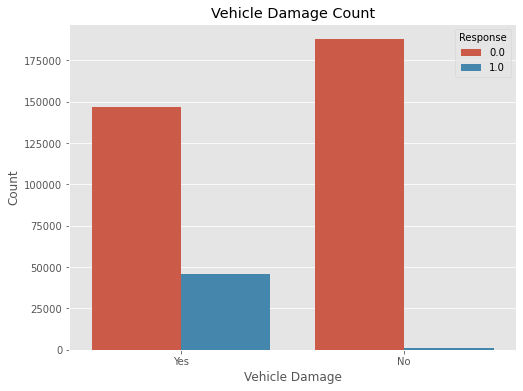

In [106]:
plt.figure(figsize=(8,6))
sns.countplot(df['Vehicle_Damage'],hue=df['Response'])
plt.title('Vehicle Damage Count')
plt.xlabel('Vehicle Damage')
plt.ylabel('Count')
plt.show()

#### We can see that vehicles with Damage has more number of responses than vehicles without damage.

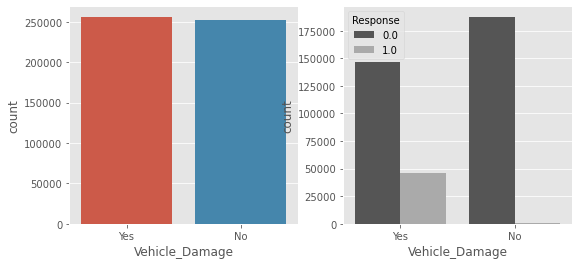

In [107]:
#Damage Vehicle and Response
plt.figure(figsize= (9,4))
plt.subplot(1,2,1)
sns.countplot(df['Vehicle_Damage'])

plt.subplot(1,2,2)
sns.countplot(df['Vehicle_Damage'], hue= df['Response'], palette ='binary_r')
plt.show()

#### Customers with vehicle damage are equallly distributed.
#### Customers with vehicle damage are more interested in the insurance.

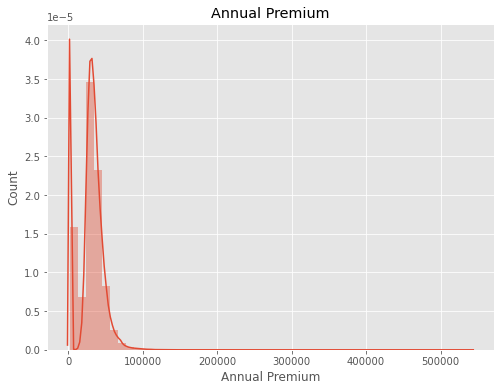

In [111]:
plt.figure(figsize=(8,6))
sns.distplot(df['Annual_Premium'])
plt.title('Annual Premium')
plt.xlabel('Annual Premium')
plt.ylabel('Count')
plt.show()

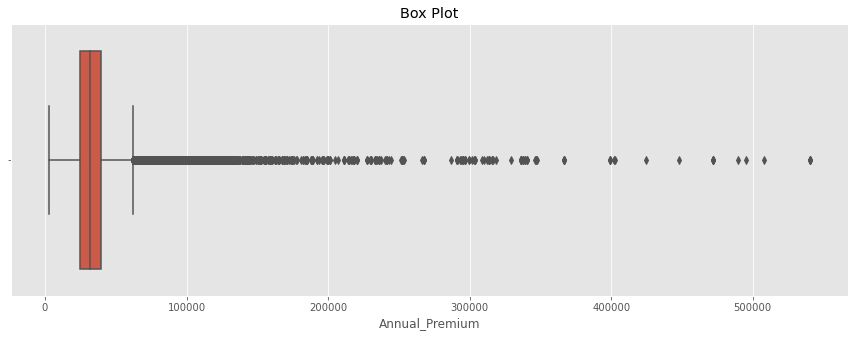

In [112]:
plt.figure(figsize = (15,5))
sns.boxplot(df['Annual_Premium'])
plt.title('Box Plot')
plt.show()

#### There are more outliers in the annual premium feature.
#### So the conclusion is we won't change anything is annual_premium data.


In [84]:
df['Policy_Sales_Channel'].nunique()

157

#### 157 unique Channels for outreaching to the customer.


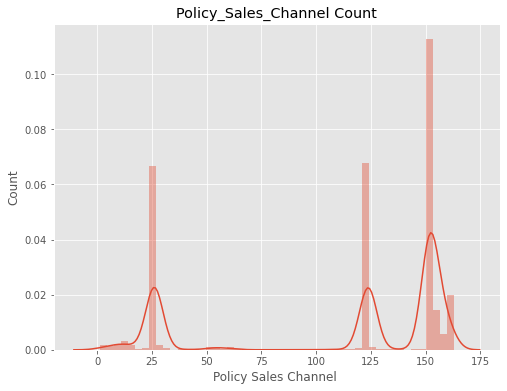

In [113]:
plt.figure(figsize=(8,6))
sns.distplot(df['Policy_Sales_Channel'])
plt.title('Policy_Sales_Channel Count')
plt.xlabel('Policy Sales Channel ')
plt.ylabel('Count')
plt.show()


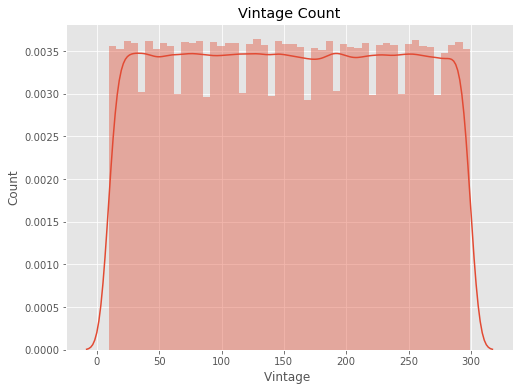

In [114]:
plt.figure(figsize=(8,6))
sns.distplot(df['Vintage'])
plt.title('Vintage Count')
plt.xlabel('Vintage ')
plt.ylabel('Count')
plt.show()

#### Vintage= Number of Days, Customer has been associated with the company.

#### This Column is uniformly distributed we can't do nothing much to this column.


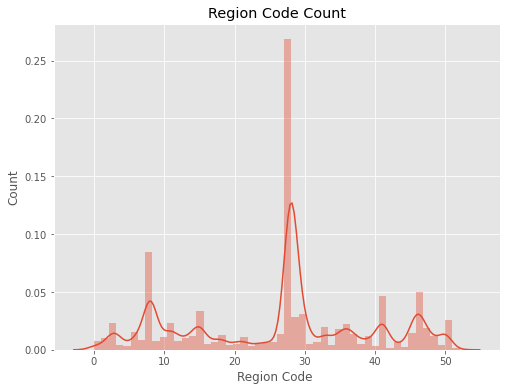

In [115]:
plt.figure(figsize=(8,6))
sns.distplot(df['Region_Code'])
plt.title('Region Code Count')
plt.xlabel('Region Code ')
plt.ylabel('Count')
plt.show()

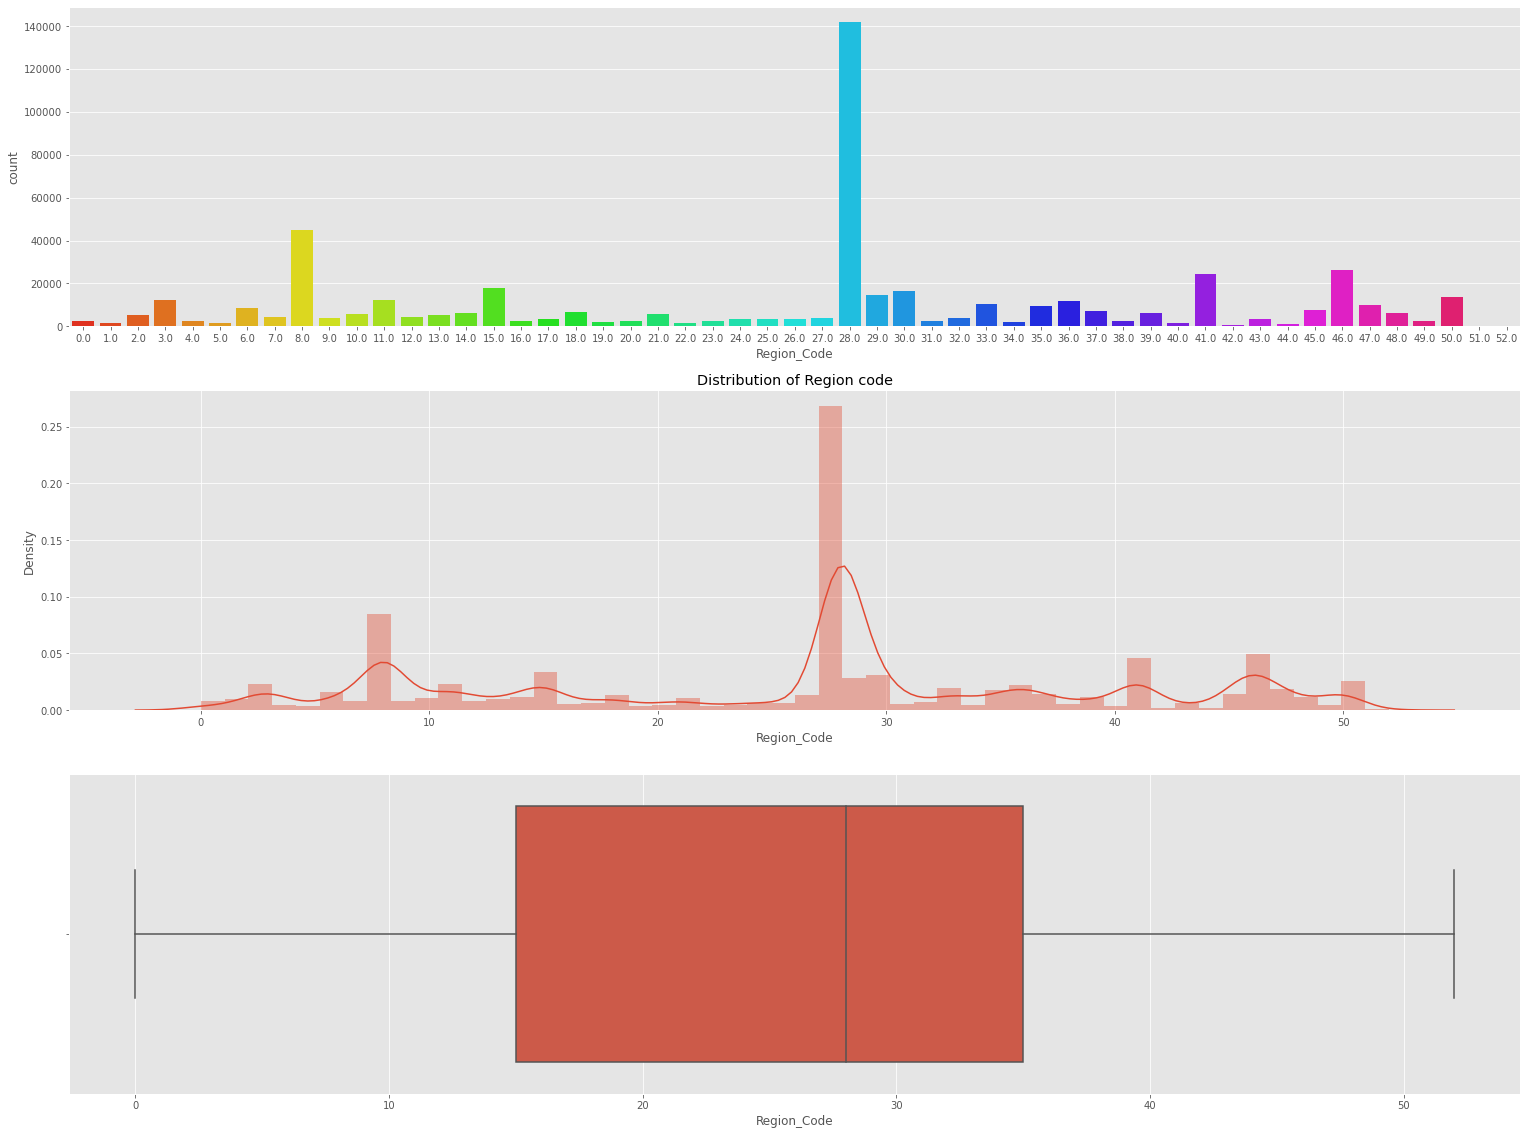

In [116]:
plt.figure(figsize=(26,20))
plt.subplot(3,1,1)
sns.countplot(df["Region_Code"], data= df, palette= 'hsv')
plt.subplot(3,1,2)
sns.distplot(df['Region_Code'])
plt.title('Distribution of Region code')
plt.subplot(3,1,3)
sns.boxplot(df['Region_Code'])
plt.show()

#### Customers from Region Code 28 has more chance of buying insurance


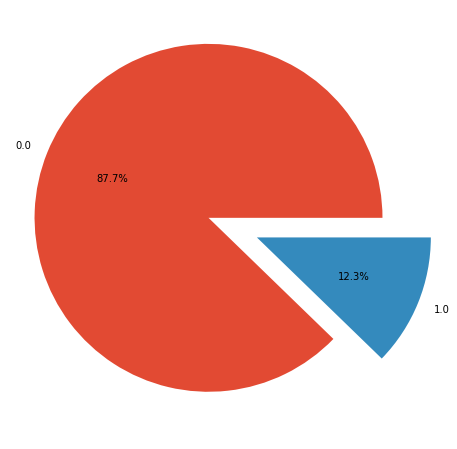

In [117]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(12,8)
inter=df['Response'].value_counts()
plt.pie(inter,labels=inter.index,autopct="%0.1f%%",explode=[0.1,0.2],radius=1);

#### There is class imbalance in the target variable.

In [118]:
var=['Age','Vintage','Annual_Premium','Response']


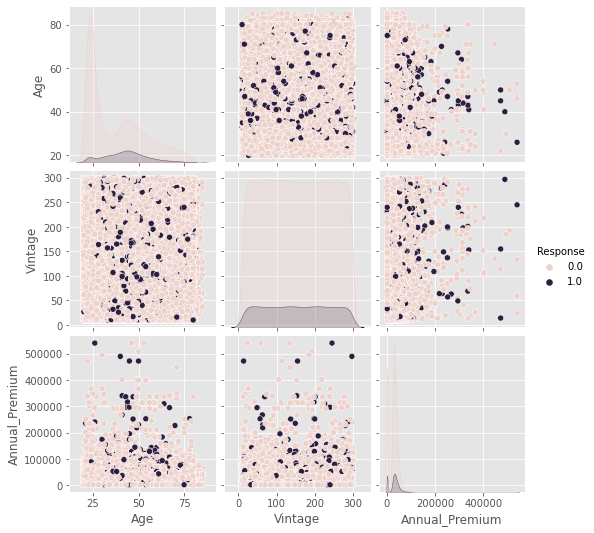

In [119]:
sns.pairplot(df[var],hue='Response');
plt.show()

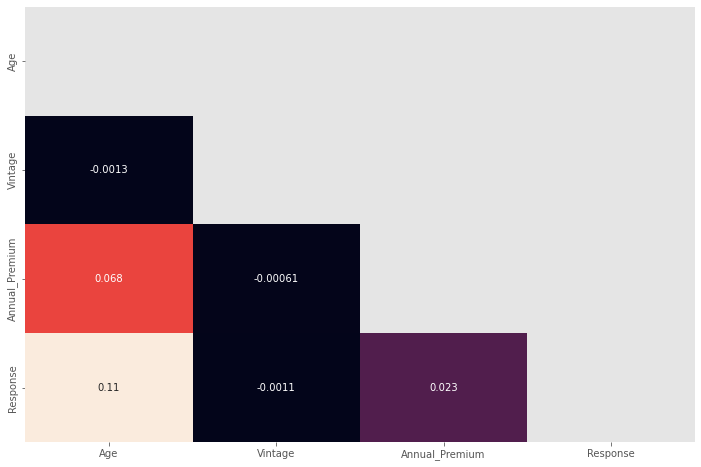

In [120]:
mask=np.triu(np.ones_like(train[var].corr()))
sns.heatmap(train[var].corr(),cbar=False,annot=True,mask=mask);
plt.show()

#### There is no visible correlation between age,vintage,annual premium variable with response variable.


In [121]:
def plot_num(var):
 
 plt.subplot(1,2,1)
 sns.histplot(train[var],color='#1f77b4');
 
 plt.subplot(1,2,2)
 sns.boxplot(y=train[var],color='#1f77b4');
 
 plt.tight_layout()


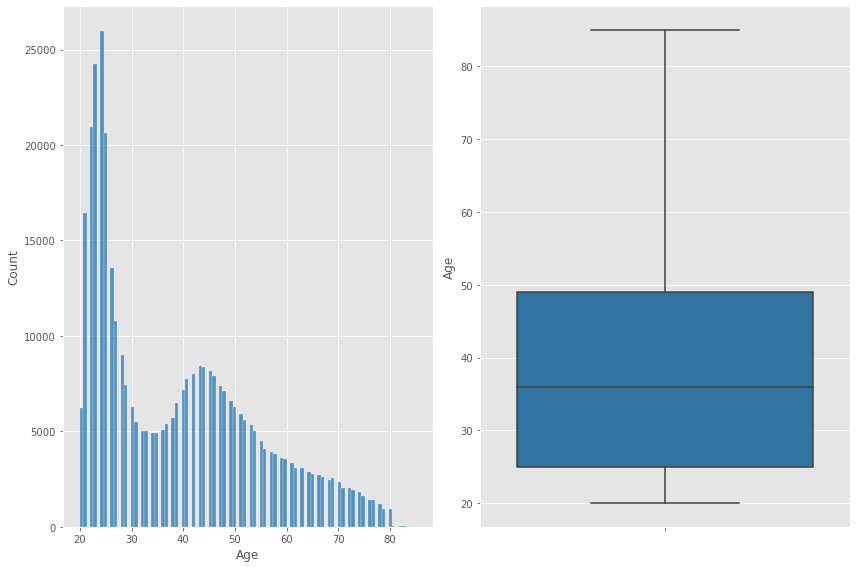

In [122]:
plot_num('Age')

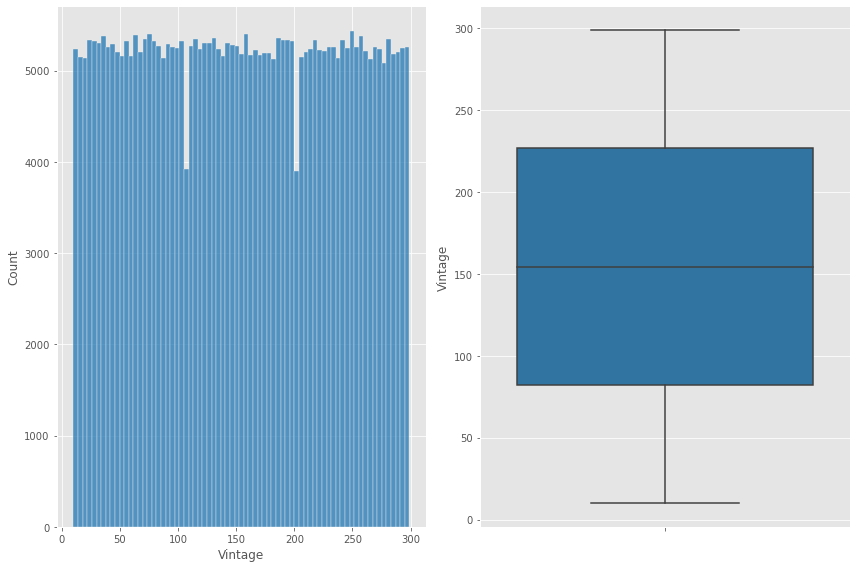

In [123]:
plot_num('Vintage')


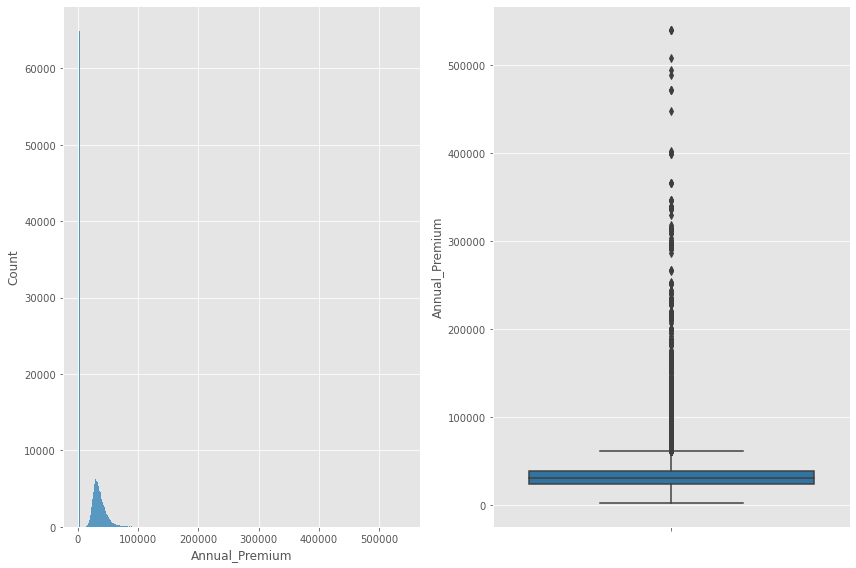

In [124]:
plot_num('Annual_Premium')

#### Age variable has non gaussian distribution.
#### Vintage varible has uniform distribution.
#### Annual Premium follows gaussian distribution with large spike.

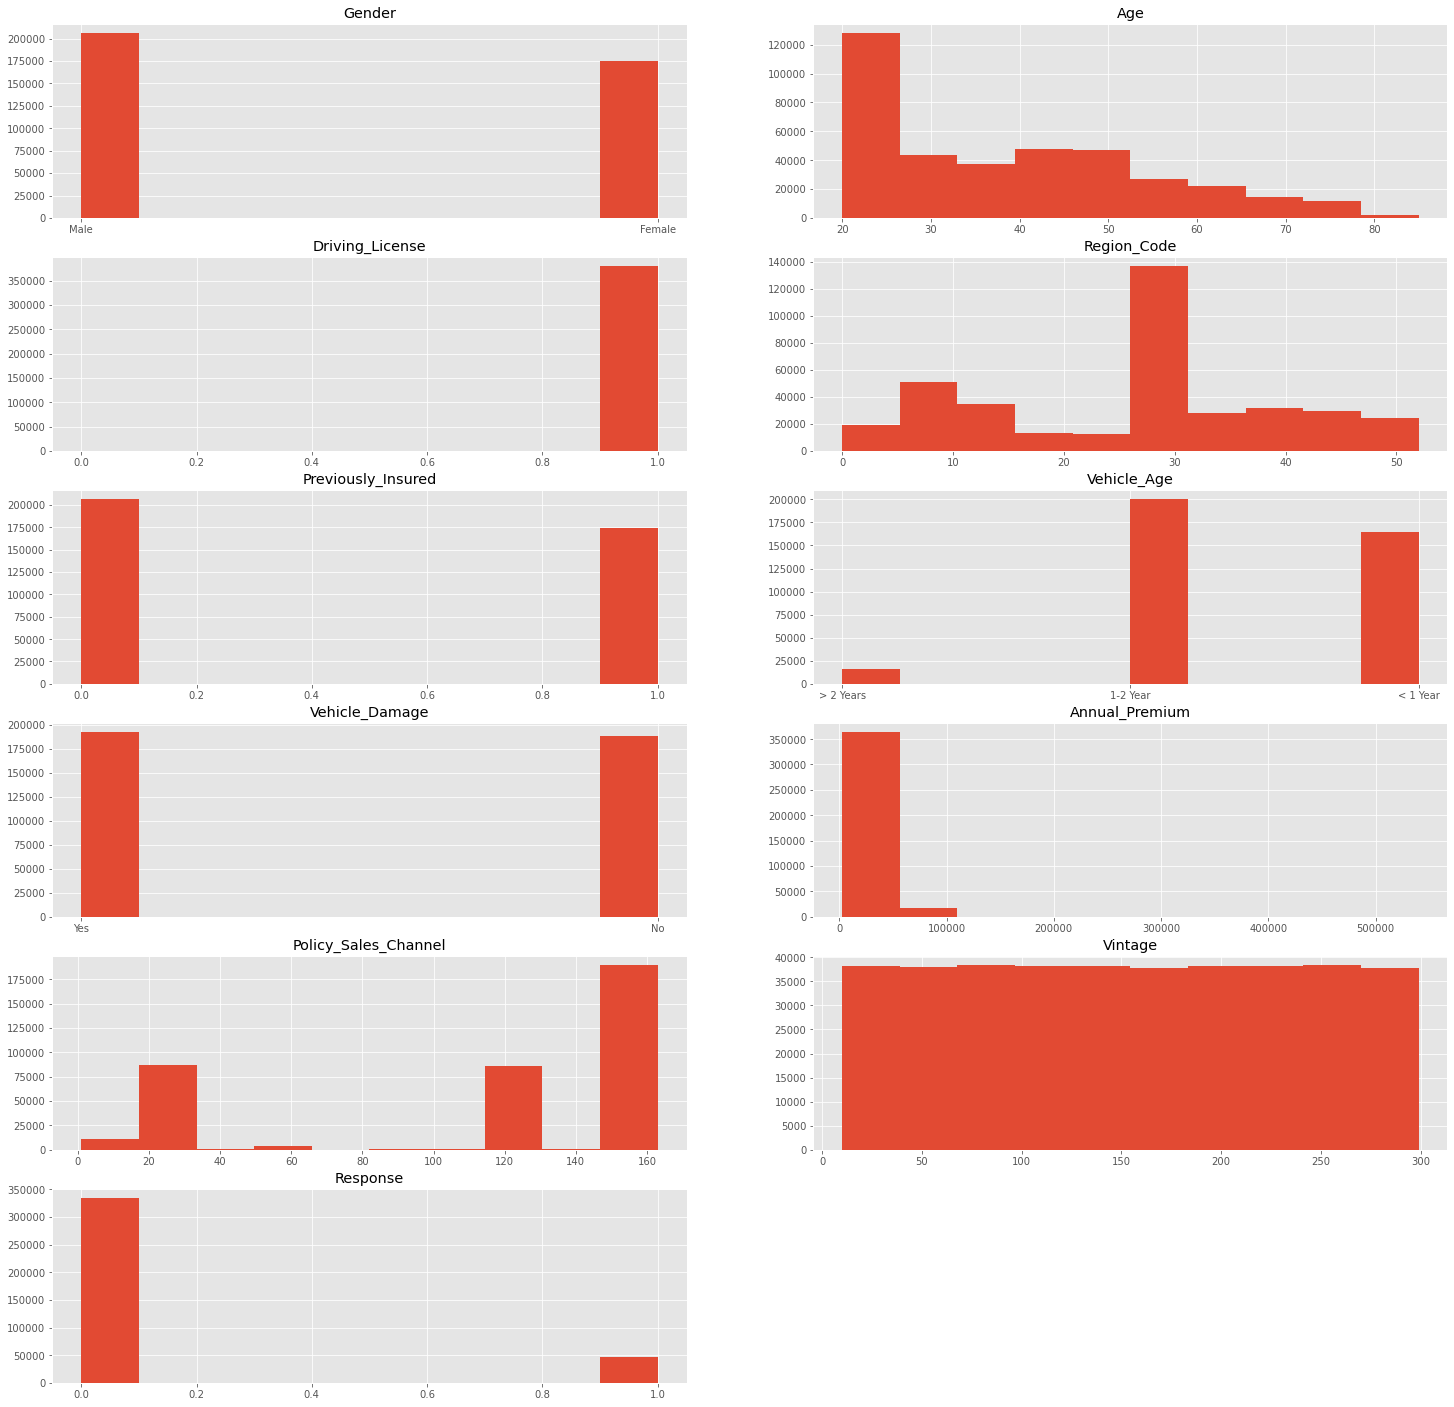

In [125]:
columns = [ 'Gender', 'Age', 'Driving_License', 'Region_Code',
 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
 'Policy_Sales_Channel', 'Vintage', 'Response']
fig = plt.figure(figsize=(25, 25))
i = 0
for col in columns:
 i+= 1
 fig.add_subplot(6,2,i)
 plt.hist(train[col])
 plt.title(col)
plt.show()


#### Interesting Insights:
##### 1) All the data we have is of previous customers, as the vintage column has all the values greater than 0.
##### 2) All prospective policy buyers in our train data set have a Driving License.
##### 3) THe dataset is imbalanced as the response variable has more number of people saying yes than no.


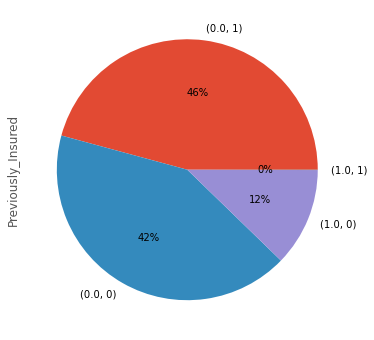

In [16]:
plt.figure(figsize=(12,6))
df.groupby(['Response'])['Previously_Insured'].value_counts().plot(kind='pie',autopct='%.0f%%')
plt.show()


#### 1. (0,1) represent to previously insured but this time not interested
#### 2. (1,0) represent to previously not insured but this time interested
#### 3. (0,0) represent neither previously nor this time interested

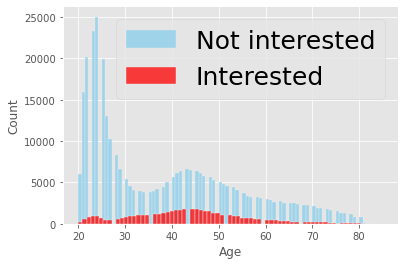

In [17]:
aux10 = df.loc[df['Response'] == 0, 'Age']
aux11 = df.loc[df['Response'] == 1, 'Age']
sns.histplot(data=aux10, color="skyblue", label="Not interested", kde=False)
sns.histplot(data=aux11, color="red", label="Interested", kde=False)
plt.legend(fontsize=25)
plt.show()


Percentage of Driving_License feature
 
1    99.793563
0     0.206437
Name: Driving_License, dtype: float64


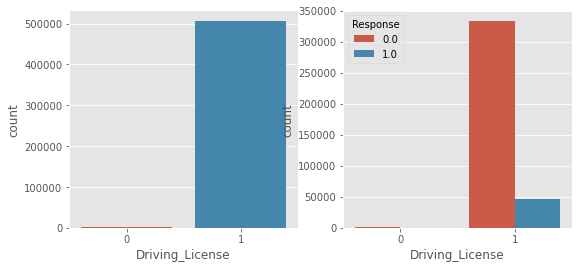

In [20]:
plt.figure(figsize= (9,4))
plt.subplot(1,2,1)
sns.countplot(df['Driving_License'])

plt.subplot(1,2,2)
sns.countplot(df['Driving_License'], hue= df['Response'])

print("Percentage of Driving_License feature\n ")
print(df['Driving_License'].value_counts()/len(df)*100)
plt.show()

#### Customers who have the Driving License are 99%.
#### Among people having Driving License who need insurance are less compared to who require no insurance.


In [22]:
aux20 = df[['Driving_License', 'Response']].groupby('Response').sum().reset_index()
aux20['Driving_license_percentage'] = aux20['Driving_License'] / aux20['Driving_License'].sum()
aux20


,Response,Driving_License,Driving_license_percentage
0,0.0,333628,0.877283
1,1.0,46669,0.122717


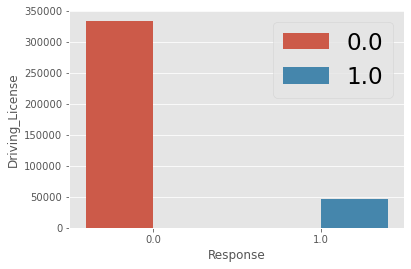

In [25]:
sns.barplot(data=aux20, x='Response', y='Driving_License', hue='Response')
plt.legend(fontsize=23)
plt.show()

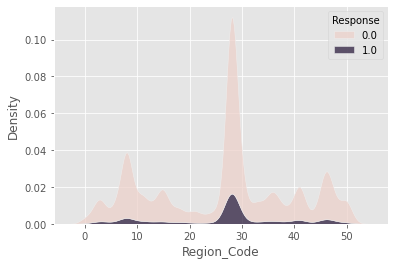

In [27]:
sns.kdeplot(x='Region_Code',data=df,hue='Response' ,multiple='stack' );


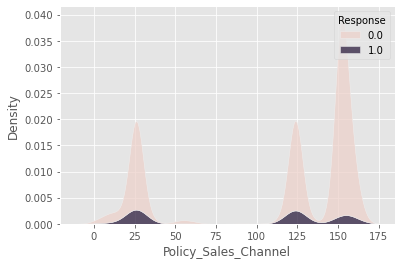

In [29]:
sns.kdeplot(x='Policy_Sales_Channel',data=df,hue='Response',multiple='stack');

In [ ]:
# Creating a function to calculate percentage of values and plotting the results

def plot_features(column):
 table_perc = df.groupby('Response')[column].value_counts(normalize = True, sort = False
 table_perc = table_perc.reset_index(name="Percentage")
 
 sns.barplot(x = column, y = 'Percentage', hue = 'Response', data = table_perc, palette
 labels = [i for i in range(0,105,5)]
 plt.yticks(labels)
 plt.ylabel('% Interested Customers')
 return plt.show()

In [ ]:
plot_features('Gender')

In [ ]:
plot_features('Previously_Insured')

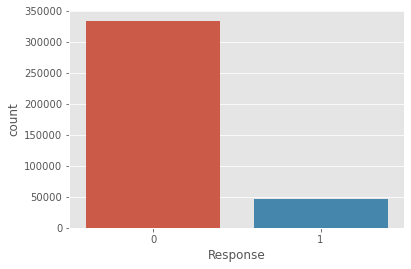

In [34]:
ax=sns.countplot(train['Response'])
total=len(df['Response'])

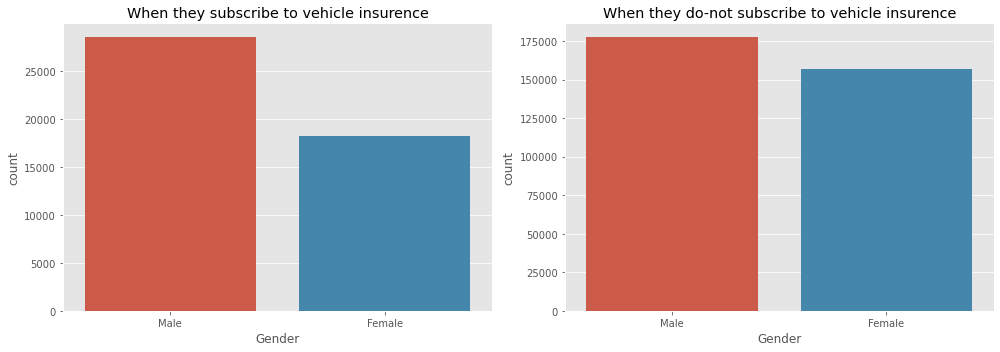

In [35]:
### Gender distribution based on response

fig, axis = plt.subplots(1, 2, figsize = (14, 5))
sns.countplot(ax = axis[0], x = train[df["Response"] == 1]["Gender"])
axis[0].set_title("When they subscribe to vehicle insurence")
sns.countplot(ax = axis[1], x = df[df["Response"] == 0]["Gender"])
axis[1].set_title("When they do-not subscribe to vehicle insurence")
fig.tight_layout()

#### From the above graph we can see that Male tend to subscribe to vehicle insurence more than female. Therefore we can assume that gender plays an important role in model building.

#### From this graph we can clearly see that Male are having positive response towards insurance purchase while female are having negative response.Thus from this we can conclude that the most targeted customers are Male than Female.So, we need to focus on strengthening the Female customers buyers for buying the insurance.


<AxesSubplot:title={'center':'Correlation Plot'}>

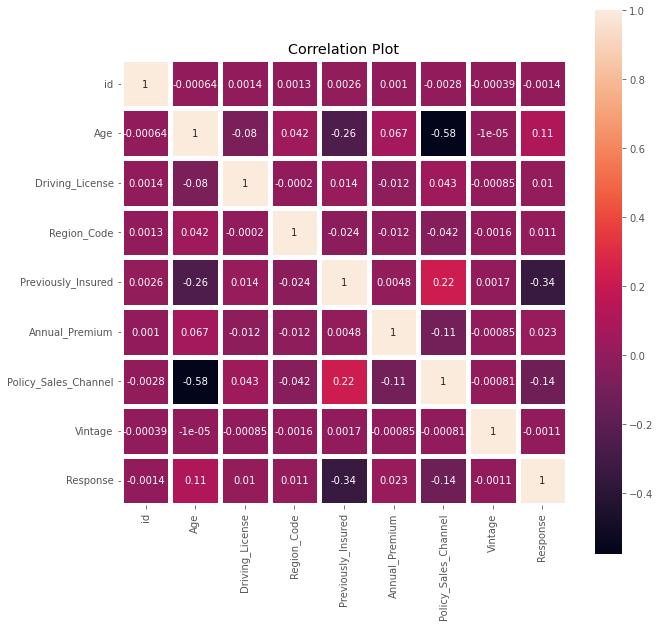

In [54]:
plt.figure(figsize = (10,10))
plt.title("Correlation Plot")
sns.heatmap(df.corr(), linewidth = 5, annot = True, square = True, annot_kws={'size': 10})


#### From the above plot we can see correlation among each features. If two features are highly correlated, we can eleminate one of them because they tend to overfit the data and we also need to make sure to consider all the features that highly correlate with the output so that they help in better prediction.

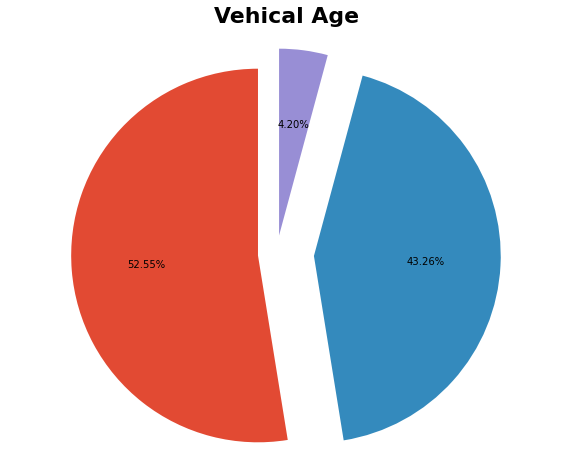

In [46]:
plt.figure(figsize=(10,8))
plt.pie(df.Vehicle_Age.value_counts(),explode=[.1,.2,.1],startangle=90,autopct='%.2f%%')
plt.title('Vehical Age',fontdict={'fontsize':22,'fontweight':'bold'})
plt.axis('equal')
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
plt.pie(train.Vehicle_Damage.value_counts(),explode=[.1,.2],startangle=90,autopct='%.2f%%',
plt.title('Vehicle Damage',fontdict={'fontsize':22,'fontweight':'bold'})
plt.axis('equal')
plt.show()

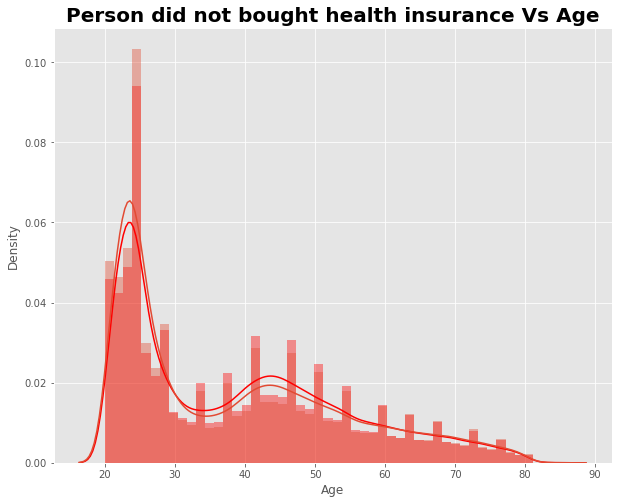

In [49]:
plt.figure(figsize=(10,8))
sns.distplot(train.Age,color='red',label='Age')
sns.distplot(train.Age[train.Response==0])
plt.title('Person did not bought health insurance Vs Age',fontdict={'fontsize':20,'fontweight':"bold"})
                        
plt.show()

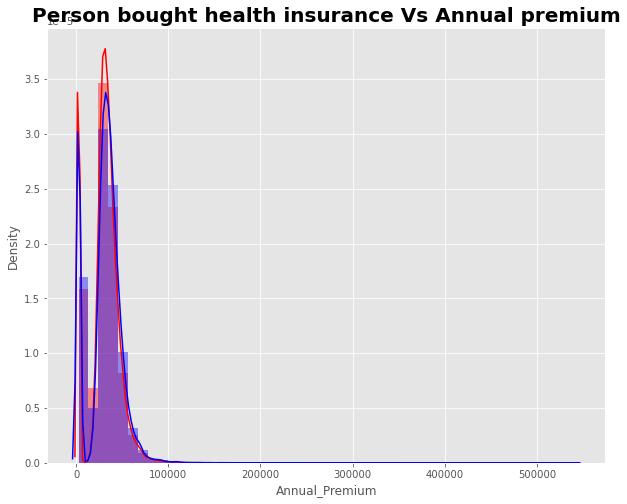

In [50]:
plt.figure(figsize=(10,8))
sns.distplot(train.Annual_Premium,color='red',label='Annual Premium')
sns.distplot(train.Annual_Premium[train.Response==1],color='blue')
plt.title('Person bought health insurance Vs Annual premium',fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()


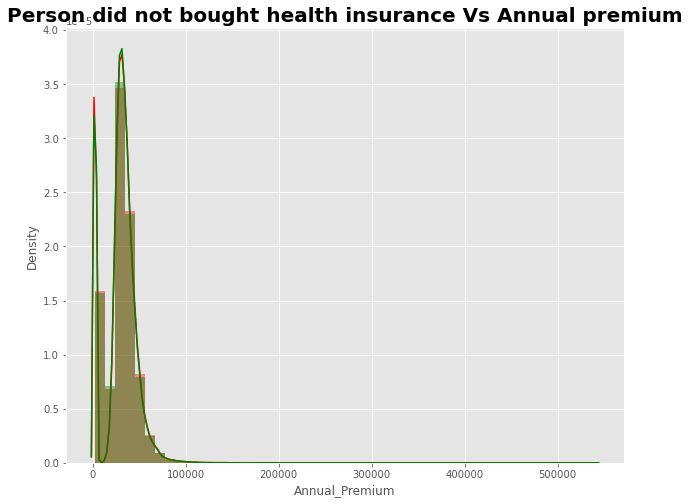

In [52]:
plt.figure(figsize=(10,8))
sns.distplot(train.Annual_Premium,color='red',label='Annual Premium')
sns.distplot(train.Annual_Premium[train.Response==0],color='green')
plt.title('Person did not bought health insurance Vs Annual premium',fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()


<AxesSubplot:title={'center':'Correlation plot'}>

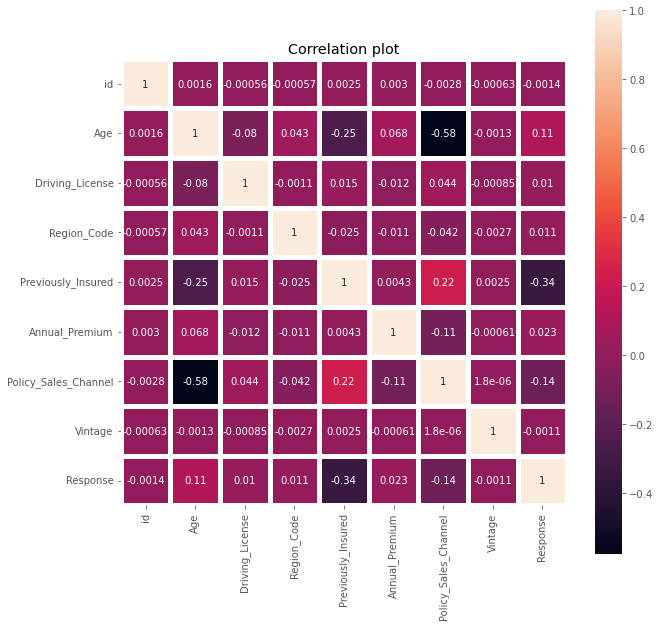

In [55]:
plt.figure(figsize=(10,10))
plt.title("Correlation plot")
sns.heatmap(train.corr(),linewidths=5, annot=True, square=True,annot_kws={'size': 10})


#### Policy sales channel has slightly low correlation with Age variable.

In [58]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [57]:
df["id"].value_counts()

1         1
338760    1
338773    1
338772    1
338771    1
         ..
169378    1
169377    1
169376    1
169375    1
508146    1
Name: id, Length: 508146, dtype: int64

In [61]:
df["Gender"].value_counts()


Male      274325
Female    233821
Name: Gender, dtype: int64

In [60]:
df["Age"].value_counts()

24    34565
23    32353
22    28058
25    27578
21    21910
      ...  
81       77
82       42
83       32
84       18
85       12
Name: Age, Length: 66, dtype: int64

In [62]:
df["Driving_License"].value_counts()

1    507097
0      1049
Name: Driving_License, dtype: int64

In [63]:
df["Region_Code"].value_counts()

28.0    141937
8.0      44900
46.0     26357
41.0     24400
15.0     17750
30.0     16276
29.0     14843
50.0     13657
3.0      12349
11.0     12328
36.0     11696
33.0     10307
47.0      9942
35.0      9309
6.0       8351
45.0      7543
37.0      7343
18.0      6903
48.0      6274
14.0      6249
39.0      6138
10.0      5847
21.0      5671
2.0       5398
13.0      5396
7.0       4313
12.0      4235
9.0       4084
32.0      3745
27.0      3711
43.0      3508
26.0      3461
17.0      3455
25.0      3352
24.0      3263
16.0      2727
0.0       2699
38.0      2677
31.0      2635
23.0      2596
20.0      2528
49.0      2388
4.0       2379
34.0      2190
19.0      2059
22.0      1729
40.0      1708
5.0       1698
1.0       1363
44.0      1064
42.0       787
52.0       357
51.0       271
Name: Region_Code, dtype: int64

In [64]:
df["Previously_Insured"].value_counts()

0    275076
1    233070
Name: Previously_Insured, dtype: int64

In [65]:
df["Vehicle_Age"].value_counts()

1-2 Year     267015
< 1 Year     219805
> 2 Years     21326
Name: Vehicle_Age, dtype: int64

In [66]:
df["Vehicle_Damage"].value_counts()


Yes    256248
No     251898
Name: Vehicle_Damage, dtype: int64

In [67]:
df["Annual_Premium"].value_counts()

2630.0     86488
69856.0      185
45179.0       57
38452.0       56
39008.0       55
           ...  
45883.0        1
18195.0        1
81070.0        1
55599.0        1
62875.0        1
Name: Annual_Premium, Length: 52062, dtype: int64

In [68]:
df["Policy_Sales_Channel"].value_counts()

152.0    179523
26.0     106594
124.0     98299
160.0     29090
156.0     14313
          ...  
41.0          1
84.0          1
144.0         1
149.0         1
142.0         1
Name: Policy_Sales_Channel, Length: 157, dtype: int64

In [69]:
df["Vintage"].value_counts()

256    1877
131    1852
73     1847
232    1843
126    1838
       ... 
279    1665
18     1664
32     1648
277    1643
50     1639
Name: Vintage, Length: 290, dtype: int64

In [70]:
df["Response"].value_counts()

0.0    334399
1.0     46710
Name: Response, dtype: int64